In [1]:
!pip install pandas bokeh matplotlib seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import Legend
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='font_ch.ttf', size=14)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os, copy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn import preprocessing


In [3]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train


df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test


(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
5,0,78377,2295,465.62,5,0,N,2,N,N,...,0,6,104918.0,451,0,N,5817,102,0,2943
6,6411,94435,49219,1806.49,3,62,N,4,N,N,...,0,6,172624.0,339,0,N,5865,102,0,1622153
7,6769,112032,177989,526.88,6,62,N,2,N,N,...,0,7,34933.0,373,79200,N,5817,102,0,57795
8,6092,92294,85535,201.39,2,62,N,2,N,N,...,0,6,64652.0,264,8335,N,3585,102,0,836165
9,0,16279,110755,465.62,5,0,N,2,N,N,...,0,10,104447.0,451,0,N,5817,102,0,4507


(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,215311.0,457,59360,N,0,102,0,592488
5,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,222541.0,457,59360,N,0,102,2,592460
6,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,100,162903.0,457,59360,N,0,102,0,590160
7,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,222022.0,457,59360,N,0,102,0,592453
8,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,95,182629.0,457,59360,N,0,102,0,585745
9,6881,163188,116799,513.80,5,0,N,0,N,N,...,0,102,221853.0,457,59360,N,0,102,0,592451


In [4]:
df_train['ecfg'] = df_train['ecfg'].map({'N': 0, 'Y': 1})
df_train['flbmk'] = df_train['flbmk'].map({'N': 0, 'Y': 1})
df_train['flg_3dsmk'] = df_train['flg_3dsmk'].map({'N': 0, 'Y': 1})
df_train['insfg'] = df_train['insfg'].map({'N': 0, 'Y': 1})
df_train['ovrlt'] = df_train['ovrlt'].map({'N': 0, 'Y': 1})

df_train = df_train.fillna(-1)

train_label = df_train[['fraud_ind']]
train_data = df_train.drop(['fraud_ind'], 1)

for c in train_data.columns:
    unique_values = train_data[c].unique()
    print(f"unique values in {c}: ", unique_values, ', ', len(unique_values))

train_data.info()
train_data.describe()

# df_test.info()
# df_test.describe()

unique values in acqic:  [6881    0 6716 ...  571 2836 3866] ,  6051
unique values in bacno:  [113261 134508  15408 ... 153635 119635 120971] ,  95214
unique values in cano:  [ 38038  45725 188328 ... 109682 208215 137381] ,  129413
unique values in conam:  [ 513.8   465.62 1016.11 ... 1761.71 2152.98  669.56] ,  72961
unique values in contp:  [5 3 6 2 4 0 1] ,  7
unique values in csmcu:  [ 0 62 74 61 13 67 60 26 49 10 71 56 20 38 22  4 47 54 75 32 66 29 28 14
 50 30 31 45 24 40 35 59  3 48 63 52 41 23 17 16 73 51 53 44 18 12 15  5
 70 21 39 27 42 11 72  6 25  7 43  2 19 37  1 64 57 36 68 55  9 46 34 69] ,  72
unique values in ecfg:  [0 1] ,  2
unique values in etymd:  [ 0  2  5  4  8  1  9  6  3  7 10] ,  11
unique values in flbmk:  [ 0.  1. -1.] ,  3
unique values in flg_3dsmk:  [ 0.  1. -1.] ,  3
unique values in hcefg:  [5 0 3 1 2 7 8 9 6] ,  9
unique values in insfg:  [0 1] ,  2
unique values in iterm:  [0 1 2 8 3 4 7 6 5] ,  9
unique values in locdt:  [33  9  6  5  7 10  8 11 13 

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,...,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,2.544870e-01,4.149114e+00,-4.933673e-03,3.401133e-02,...,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,1.330738e-02,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,4.355726e-01,2.394259e+00,1.075942e-01,2.222366e-01,...,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.145875e-01,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,0.000000e+00,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,...,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,1.000000e+00,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


In [5]:
output_notebook()

hist, edges = np.histogram(train_data['acqic'], density = False, bins = 'fd')
p1 = figure(title = "Distribution of acqic", tools = "")
p1.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p1.legend.location = "top_left"
p1.xaxis.axis_label = 'acqic'
p1.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['bacno'], density = False, bins = 'fd')
p2 = figure(title = "Distribution of bacno", tools = "")
p2.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p2.legend.location = "top_left"
p2.xaxis.axis_label = 'bacno'
p2.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['cano'], density = False, bins = 'fd')
p3 = figure(title = "Distribution of cano", tools = "")
p3.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p3.legend.location = "top_left"
p3.xaxis.axis_label = 'cano'
p3.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['conam'], density = False, bins = 'fd')
p4 = figure(title = "Distribution of conam", tools = "")
p4.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p4.legend.location = "top_left"
p4.xaxis.axis_label = 'conam'
p4.yaxis.axis_label = 'Number of records'

# https://docs.bokeh.org/en/latest/
p5 = figure(x_range=[str(i) for i in np.unique(train_data['contp']).tolist()], plot_height=250,title='Distribution of contp')
p5.vbar(x=[str(i) for i in np.unique(train_data['contp']).tolist()], top=train_data.groupby(['contp'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p6 = figure(x_range=[str(i) for i in np.unique(train_data['csmcu']).tolist()], plot_height=250,title='Distribution of csmcu')
p6.vbar(x=[str(i) for i in np.unique(train_data['csmcu']).tolist()], top=train_data.groupby(['csmcu'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p7 = figure(x_range=[str(i) for i in np.unique(train_data['ecfg']).tolist()], plot_height=250,title='Distribution of ecfg')
p7.vbar(x=[str(i) for i in np.unique(train_data['ecfg']).tolist()], top=train_data.groupby(['ecfg'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p8 = figure(x_range=[str(i) for i in np.unique(train_data['etymd']).tolist()], plot_height=250,title='Distribution of etymd')
p8.vbar(x=[str(i) for i in np.unique(train_data['etymd']).tolist()], top=train_data.groupby(['etymd'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p9 = figure(x_range=[str(i) for i in np.unique(train_data['flbmk']).tolist()], plot_height=250,title='Distribution of flbmk')
p9.vbar(x=[str(i) for i in np.unique(train_data['flbmk']).tolist()], top=train_data.groupby(['flbmk'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p10 = figure(x_range=[str(i) for i in np.unique(train_data['flg_3dsmk']).tolist()], plot_height=250,title='Distribution of flg_3dsmk')
p10.vbar(x=[str(i) for i in np.unique(train_data['flg_3dsmk']).tolist()], top=train_data.groupby(['flg_3dsmk'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p11 = figure(x_range=[str(i) for i in np.unique(train_data['hcefg']).tolist()], plot_height=250,title='Distribution of hcefg')
p11.vbar(x=[str(i) for i in np.unique(train_data['hcefg']).tolist()], top=train_data.groupby(['hcefg'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p12 = figure(x_range=[str(i) for i in np.unique(train_data['insfg']).tolist()], plot_height=250,title='Distribution of insfg')
p12.vbar(x=[str(i) for i in np.unique(train_data['insfg']).tolist()], top=train_data.groupby(['insfg'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p13 = figure(x_range=[str(i) for i in np.unique(train_data['iterm']).tolist()], plot_height=250,title='Distribution of iterm')
p13.vbar(x=[str(i) for i in np.unique(train_data['iterm']).tolist()], top=train_data.groupby(['iterm'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

hist, edges = np.histogram(train_data['locdt'], density = False, bins = 'fd')
p14 = figure(title = "Distribution of locdt", tools = "")
p14.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p14.legend.location = "top_left"
p14.xaxis.axis_label = 'locdt'
p14.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['loctm'], density = False, bins = 'fd')
p15 = figure(title = "Distribution of loctm", tools = "")
p15.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p15.legend.location = "top_left"
p15.xaxis.axis_label = 'loctm'
p15.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['mcc'], density = False, bins = 'fd')
p16 = figure(title = "Distribution of mcc", tools = "")
p16.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p16.legend.location = "top_left"
p16.xaxis.axis_label = 'mcc'
p16.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['mchno'], density = False, bins = 'fd')
p17 = figure(title = "Distribution of mchno", tools = "")
p17.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p17.legend.location = "top_left"
p17.xaxis.axis_label = 'mchno'
p17.yaxis.axis_label = 'Number of records'

hist, edges = np.histogram(train_data['scity'], density = False, bins = 'fd')
p18 = figure(title = "Distribution of scity", tools = "")
p18.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p18.legend.location = "top_left"
p18.xaxis.axis_label = 'scity'
p18.yaxis.axis_label = 'Number of records'

p19 = figure(x_range=[str(i) for i in np.unique(train_data['stocn']).tolist()], plot_height=250,title='Distribution of stocn')
p19.vbar(x=[str(i) for i in np.unique(train_data['stocn']).tolist()], top=train_data.groupby(['stocn'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

p20 = figure(x_range=[str(i) for i in np.unique(train_data['stscd']).tolist()], plot_height=250,title='Distribution of stscd')
p20.vbar(x=[str(i) for i in np.unique(train_data['stscd']).tolist()], top=train_data.groupby(['stscd'])['txkey'].count().values, 
        width=0.9, color = '#4169E1')

show(gridplot([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20], 
              ncols = 2, plot_width = 400, plot_height = 400))


Loading BokehJS ...

GlyphRenderer(id='1027', ...)

GlyphRenderer(id='1056', ...)

GlyphRenderer(id='1085', ...)

GlyphRenderer(id='1114', ...)

GlyphRenderer(id='1154', ...)

GlyphRenderer(id='1194', ...)

GlyphRenderer(id='1234', ...)

GlyphRenderer(id='1274', ...)

GlyphRenderer(id='1314', ...)

GlyphRenderer(id='1354', ...)

GlyphRenderer(id='1394', ...)

GlyphRenderer(id='1434', ...)

GlyphRenderer(id='1474', ...)

GlyphRenderer(id='1503', ...)

GlyphRenderer(id='1532', ...)

GlyphRenderer(id='1561', ...)

GlyphRenderer(id='1590', ...)

GlyphRenderer(id='1619', ...)

GlyphRenderer(id='1659', ...)

GlyphRenderer(id='1699', ...)

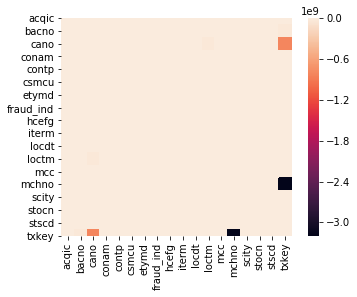

In [12]:
sns.heatmap(df_train.cov(), vmax=.8, square=True)


The variables with high negative covariance are:
- txkey & mchno
- txkey & cano

*fraud_ind* has relatively high negative correlation with *stocn*

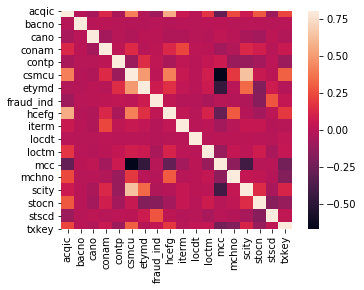

In [13]:
sns.heatmap(df_train.corr(), vmax=.8, square=True)

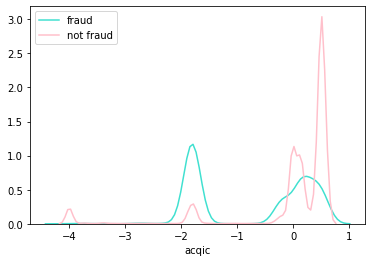

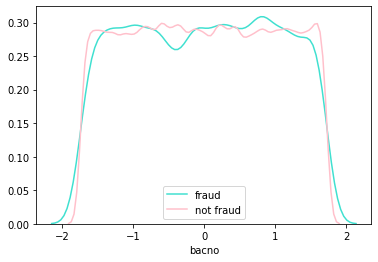

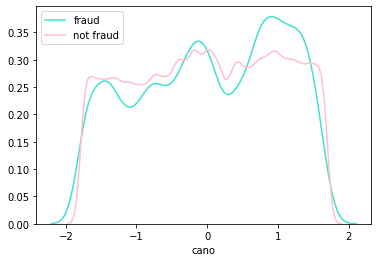

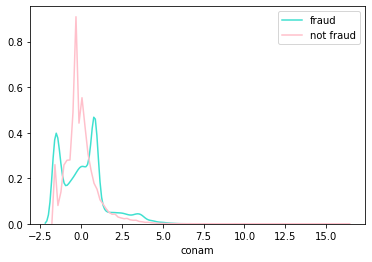

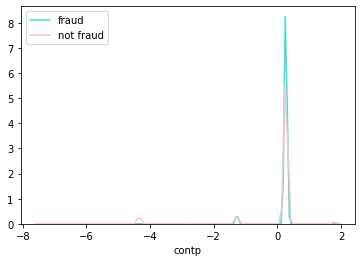

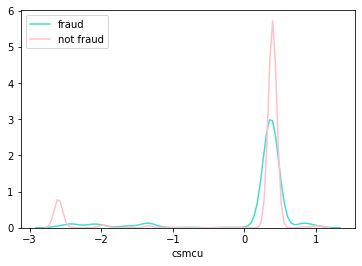

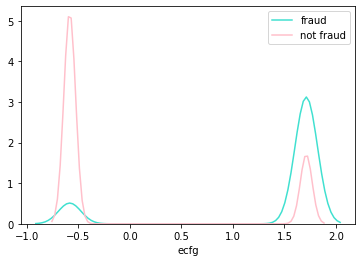

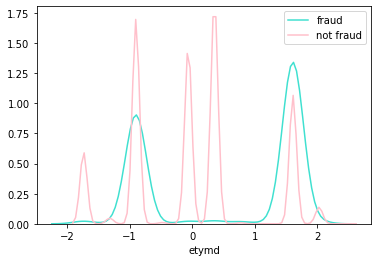

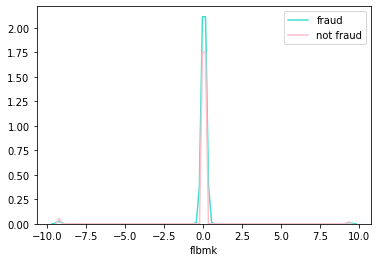

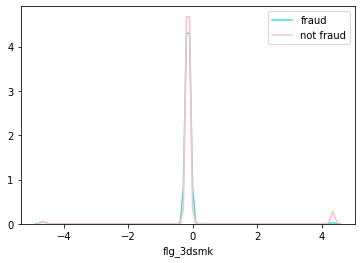

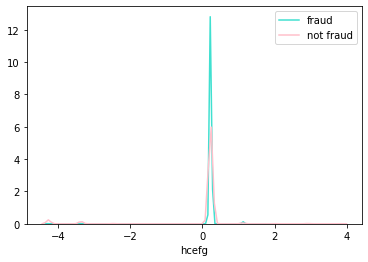

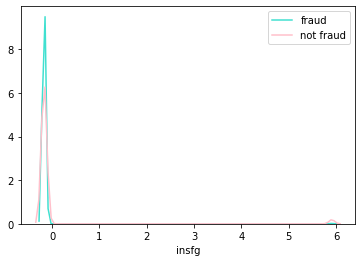

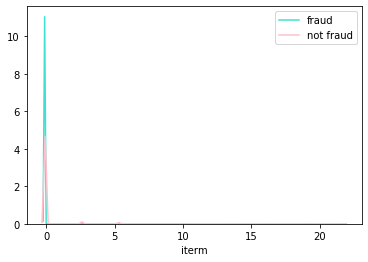

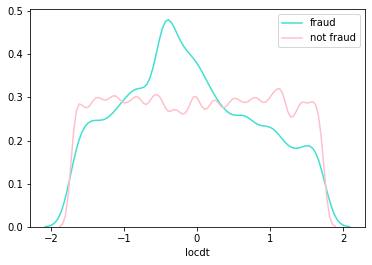

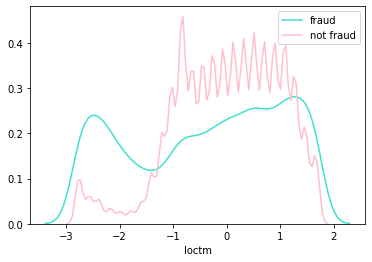

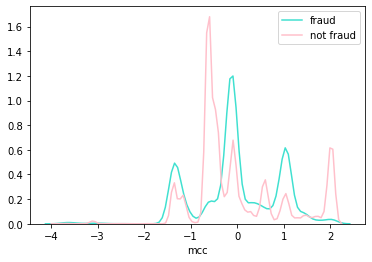

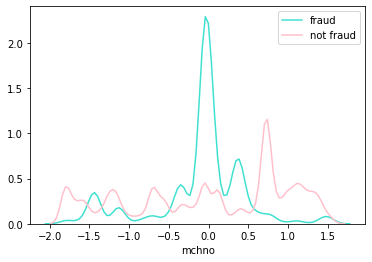

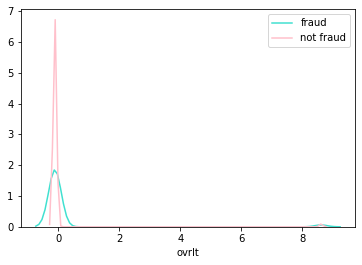

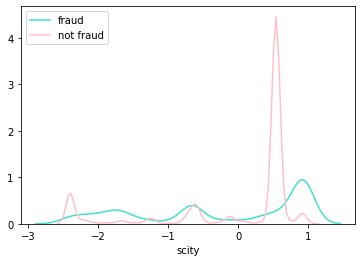

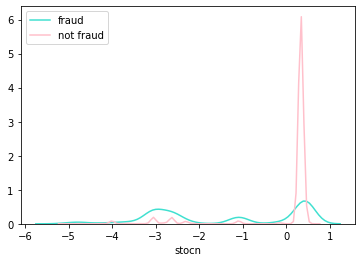

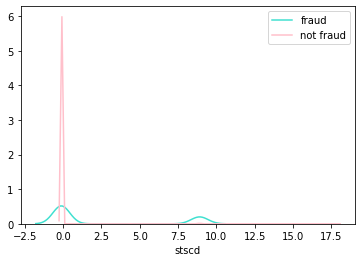

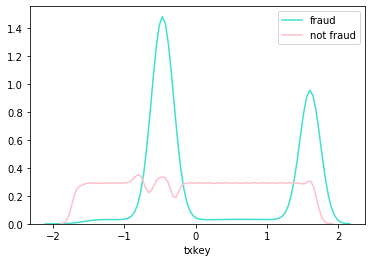

In [20]:
e_fraud = np.where(df_train['fraud_ind'] == 1)[0]
e_notfraud = np.where(df_train['fraud_ind'] == 0)[0]
cols = train_data.columns
# i=361
# plt.figure(1)
for col in cols:
#     plt.subplot(i)
    X = preprocessing.scale(df_train.loc[:, col])
    X = np.expand_dims(X, axis=1)
    X_fraud = X[e_fraud,:]
    X_notfraud = X[e_notfraud, :]
    
    sns.distplot(X_fraud, axlabel = col, hist = False, 
                 color = 'turquoise', label = 'fraud');
    sns.distplot(X_notfraud, axlabel = col, hist = False, 
                 color = 'pink', label = 'not fraud');

    i=i+1
#     plt.tight_layout()
    plt.show()

In [ ]:
sns.set(color_codes=True)
var = list(train_data.columns[:10])
sns.pairplot(df_train, hue='fraud_ind', vars=var, palette='husl')
plt.show()

#### Observation
1. 